# Modelo de valoración de activos

### El Modelo de Valoración de Activos de Capital (CAPM) es uno de los modelos más importantes en la teoría financiera moderna. fue desarrollado en la década de 1960 por William Sharpe, John Lintner y Jan Mossin, como una extensión de la teoría de carteras de Harry Markowitz. el CAPM revolucionó la forma de valorar activos financieros, introduciendo el concepto de que los inversionistas deben ser compensados por asumir un riesgo sistemático. Aunque ha sido ampliamente utilizado, también ha recibido críticas por sus suposiciones de mercados eficientes y la dificultad de medir con precisión el beta. En 1990, Sharpe recibió el Premio Nobel de Economía por sus contribuciones a la teoría de carteras y el CAPM.

### El Capital Asset Pricing Model (CAPM) se define matemáticamete como sigue:

##                                      E(Ri) = Rf + βi[E(Rm) - Rf]

### Dónde: 

### E(Ri) = es el retorno esperado del activo i 
### Rf = Rentabilidad del activo sin riesgo (bono del estado, por ejemplo)
### βi = Beta del activo i
### E(Rm) = Rentabilidad media del mercado

### Además, [E(Rm) - Rf] es el Risk premium o prima de riesgo es el retorno adicional que un inversor exige por asumir un riesgo adicional, en comparación con una inversión libre de riesgo. En otras palabras, es la diferencia entre el rendimiento esperado de un activo arriesgado (como acciones, bonos corporativos, etc.) y el rendimiento de un activo considerado libre de riesgo (como los bonos del gobierno de un país estable).

### Lo fundamental del CAPM es que afirma que la rentabilidad esperada, E(R) de un activo cualquiera debe ser una funcion lineal de su riesgo sistemático (beta). De modo de que el único riesgo relevante, del que no se puede eliminar por medio de la diversificación, es el beta. 
   


## Interpretación del Beta

### En esencia, la Beta es un indicador que mide la volatilidad o, que es lo mismo, el riesgo sistematico de una acción o cartera de activos frente a un índice de referencia (benchmarking). De modo que nos indica en que medida la rentabilidad de una acción o cartera se ve afectada por los movimientos del mercado en su conjunto. 

### ¿Cómo se interpreta? 

### Beta = 1: La acción se mueve al mismo ritmo que el mercado.

### Beta < 1: La acción es menos volátil que el mercado.

### Beta > 1: La acción es más volátil que el mercado.

### Beta < 0: La acción se mueve en dirección opuesta al mercado.

### Otra cosa a destacar es que no predice el futuro ¡Sopresa, ningún indicador lo hace! Solo es capaz de medir el rendimiento pasado, además de que es muy simple, por lo que no toma en cuenta otros factores relevantes como las ganancias netas de la empresa y el potencial de crecimiento. Por lo que recomendamos usarlo junto a otros indicadores esenciales. 




# Cáculo del Beta

### Hay muchas formas, la que aplicares será la de una regresión lineal por minimos cuadrados ordinarios, que se define como sigue:

## y = α + βi * xi + εi 

### En este caso, Y, la variable dependiente es del activo i, a su vez, la variable explicativa es la cartera del mercado, que como presenta una dificulta práctica de su calculo, al haber tantas empresas cotizando en el mercado se toma como base una muestra representativa, en este caso un índice (SP500). Para estimar beta0 y beta1 se usa las siguientes fórmulas.

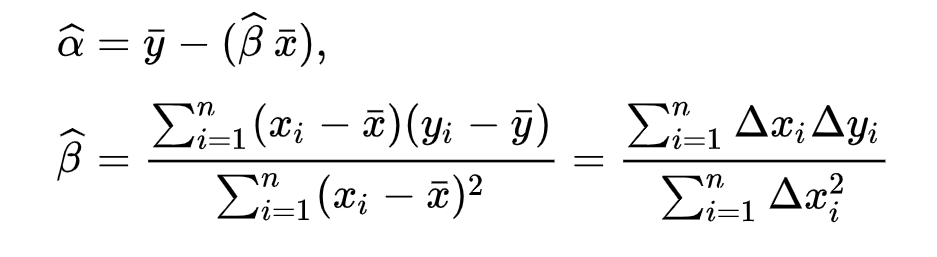

### (Para mayor profundización en el modelo de regresión lineal: https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf)



### Importamos librerias

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import datetime as dt
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [43]:
tickers = ["^GSPC", "AAPL", "BA", "MSFT", "NVDA"]
end = dt.datetime.now()
start = end - dt.timedelta(days = 365)

df_raw = yf.download(tickers= tickers, start = start, end= end)

# Reseteamos los índices del dataframe
df_raw.index = df_raw.index.strftime('%Y-%m-%d')

# Vemos los últimos 5 días
df = df_raw["Close"].copy()
df = df.rename(columns= {"^GSPC" : "SP500"})
df.tail()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,BA,MSFT,NVDA,SP500
Date,,,,,
2024-11-11,224.229996,148.960007,418.010010,145.259995,6001.350098
2024-11-12,224.229996,145.169998,423.029999,148.289993,5983.990234
2024-11-13,225.119995,139.970001,425.200012,146.270004,5985.379883
2024-11-14,228.220001,138.139999,426.890015,146.759995,5949.169922
2024-11-15,225.000000,140.190002,415.000000,141.979996,5870.620117


## Gráficamos

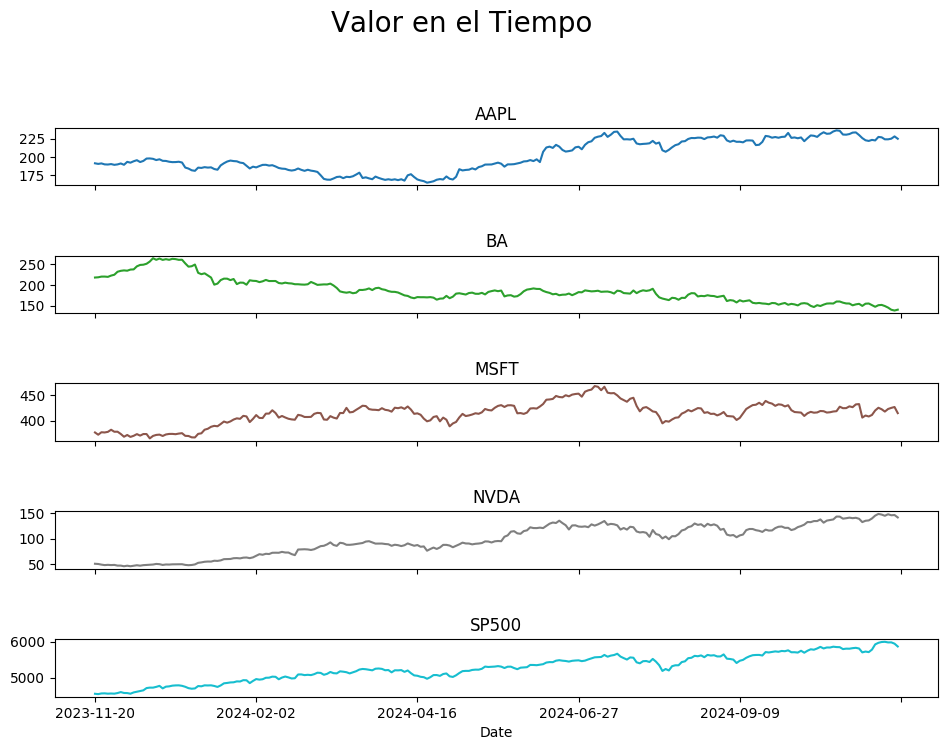

In [44]:
plt.style.use("_classic_test_patch")

cmap = plt.colormaps.get_cmap('tab10')

fig, ax = plt.subplots(df.shape[1], 1, sharex=True)

for i, column in enumerate(df.columns):
    color = cmap(i / (len(df.columns) - 1))
    df[column].plot(ax=ax[i], kind= "line", color = color)
    ax[i].set_title(column)

fig.suptitle("Valor en el Tiempo", fontsize= 20)
plt.tight_layout()
plt.gcf().set_size_inches(10,8)
plt.show()

                AAPL        BA      MSFT      NVDA     SP500
Date                                                        
2024-11-11 -0.012102 -0.018095 -0.010779 -0.016184  0.000969
2024-11-12  0.000000 -0.025772  0.011938  0.020645 -0.002897
2024-11-13  0.003961 -0.036477  0.005117 -0.013716  0.000232
2024-11-14  0.013677 -0.013160  0.003967  0.003344 -0.006068
2024-11-15 -0.014210  0.014731 -0.028248 -0.033112 -0.013291


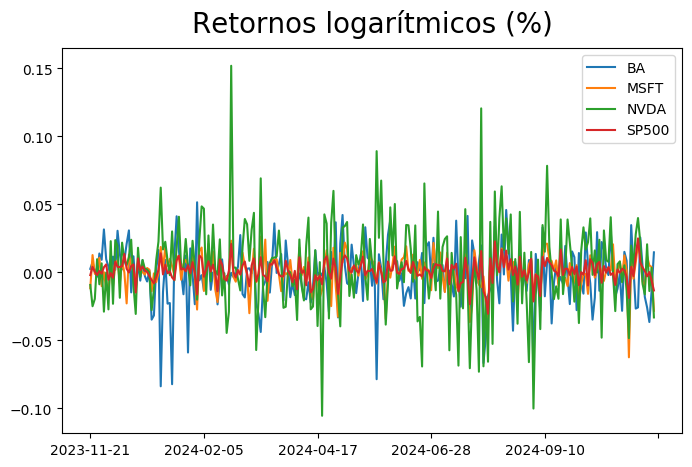

In [45]:
log_returns = pd.DataFrame()

# Un bucle for para itear sobre cada columna del df de la cartera propuesta
for ticker in df:
    log_returns[ticker] = np.log(df[ticker] / df[ticker].shift(1)).dropna()

# Miramos los últimos 5 retornos diarios
print(log_returns.tail())

# Gráfiquemos ahora los retornos logarítmicos
log_returns[log_returns.columns[1:]].plot()
plt.gcf().set_size_inches(8, 5)
plt.title("Retornos logarítmicos (%)", fontsize= 20, y = 1.02)
plt.xlabel("")
plt.legend()
plt.show()

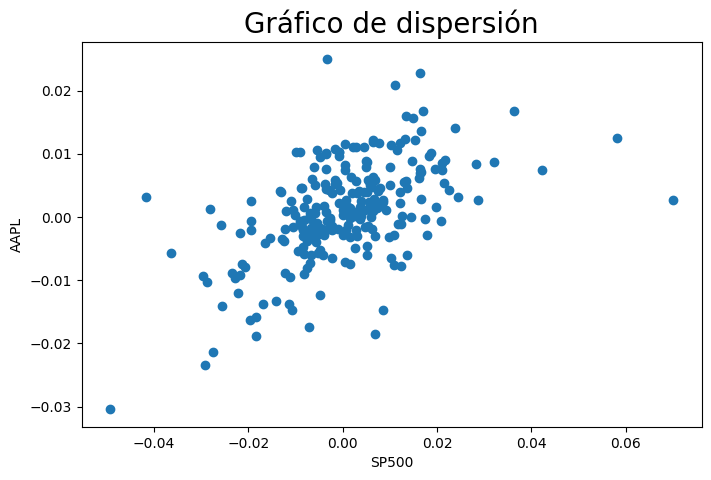

In [46]:
# Vemos ahora una relación visual de los datos
plt.scatter(y = log_returns["SP500"], x= log_returns[log_returns.columns[0]])
plt.gcf().set_size_inches(8, 5)
plt.title("Gráfico de dispersión", fontsize = 20)
plt.xlabel(df.columns[-1])
plt.ylabel(df.columns[0])
plt.show()

## Estimemos la Beta de una acción

In [47]:
# Hacemos ahora una regresión lineal para estimar la beta de la acción
x = sm.add_constant(log_returns["SP500"])

model = sm.OLS(endog = log_returns[log_returns.columns[0]], exog= x).fit()
alpha, beta = model.params # de momento no es importante el alpha, puede ver: 
#https://www.acsu.buffalo.edu/~keechung/Collection%20of%20Papers%20for%20courses/Behavioral%20Finance%20and%20Sources%20of%20Alpha.pdf

print(f"Beta de {df.columns[0]}: {round(beta, 4)} \nAlpha de {df.columns[0]}: {round(alpha, 4)}")
model.summary() # El regresor (SP500) da p-value de 0.000 por lo que se da como signficativo de igual forma el F-statistic



Beta de AAPL: 0.9806 
Alpha de AAPL: -0.0004


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     99.49
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           6.59e-20
Time:                        18:32:41   Log-Likelihood:                 748.96
No. Observations:                 249   AIC:                            -1494.
Df Residuals:                     247   BIC:                            -1487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.466      0.642      -0.002       0.001
SP500          0.9806      0.098      9.974      0.000       0.787       1.174
==============================================================================
Omnibus:                       57.651   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.692
Skew:                           0.820   Prob(JB):                     6.11e-60
Kurtosis:                       7.858   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

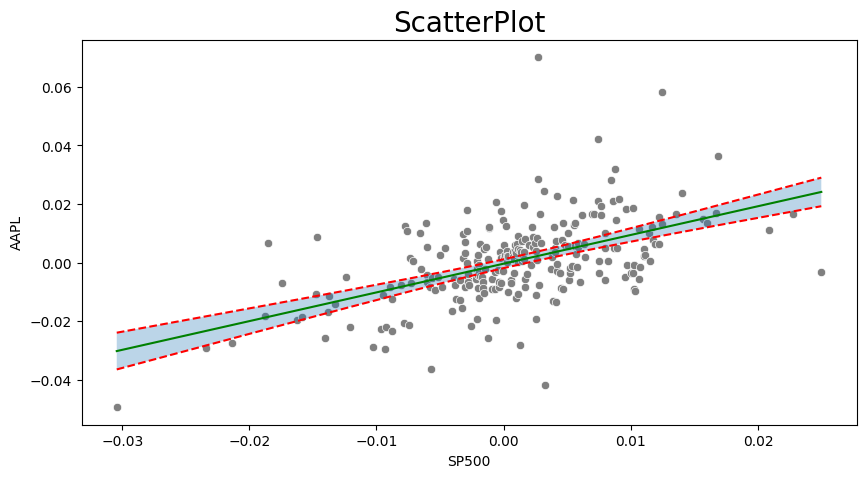

In [48]:
linea_ajustada = model.get_prediction(exog= x).summary_frame(alpha = 0.05)
linea_ajustada.tail()

linea_ajustada['x'] = x.loc[:, "SP500"]
linea_ajustada['y'] = log_returns["AAPL"]
linea_ajustada = linea_ajustada.sort_values('x')

fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=linea_ajustada, x="x", y="y", color = "grey")
ax.plot(linea_ajustada['x'], linea_ajustada["mean"], linestyle='-', label=f"Beta de {log_returns.columns[0]}", color= "green")
ax.plot(linea_ajustada['x'], linea_ajustada["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(linea_ajustada['x'], linea_ajustada["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(linea_ajustada['x'], linea_ajustada["mean_ci_lower"], linea_ajustada["mean_ci_upper"], alpha=0.3)
plt.title("ScatterPlot", fontsize = 20 )
plt.xlabel(f"{df.columns[-1]}")
plt.ylabel(f"{df.columns[0]}")
plt.show()

## Cáculo del CAPM 

In [49]:
def CAPM(risk_free, beta, return_market):
    capm = risk_free + beta * (return_market - risk_free)
    return capm

In [50]:
risk_free = 0

return_market_daily = log_returns["SP500"].mean()
return_market_annualized = (1 + return_market_daily)**252 - 1

capm_nvda = CAPM(risk_free= risk_free, beta= beta, return_market= return_market_annualized)
print(f"La rentabilidad esperada en base al CAPM de {df.columns[0]} es: {str(round(capm_nvda * 100, 2))}%")

La rentabilidad esperada en base al CAPM de AAPL es: 28.91%


## Beta de cada activo de la cartera

In [51]:
betas = {}
alphas = {}

for stock in log_returns.columns:
    if stock != "Date" and stock != "SP500":
        x = sm.add_constant(x)
        models = sm.OLS(endog = log_returns[stock], exog= x).fit()
        results = models.params
        betas[stock] = float(results[1]) 
        alphas[stock] = float(results[0])

alphas = pd.DataFrame.from_dict(alphas, orient= "index", columns= ["Alphas"])
betas = pd.DataFrame.from_dict(betas, orient='index', columns=['Betas'])

df_resultados = pd.concat([alphas, betas], axis=1)
df_resultados

,Alphas,Betas
AAPL,-0.000357,0.980593
BA,-0.002529,0.742506
MSFT,-0.000813,1.164291
NVDA,0.001330,2.758124


In [52]:
risk_free = 0

camps = {}

for b in df_resultados["Betas"]:
    er = CAPM(risk_free= risk_free, beta= b, return_market= return_market_annualized)
    camps[b] = er
df_resultados["Rendimiento Esperado (CAPM)"] = df_resultados["Betas"].map(camps)
df_resultados

,Alphas,Betas,Rendimiento Esperado (CAPM)
AAPL,-0.000357,0.980593,0.289076
BA,-0.002529,0.742506,0.218889
MSFT,-0.000813,1.164291,0.343229
NVDA,0.001330,2.758124,0.813086


## Beta y CAPM de la Cartera

### Hasta ahora, solo hemos cálculado la beta de cada acción de nuestra cartera, no obstante, es posible hallar la beta de la cartera, que es la media ponderada de las betas, se define como sigue:

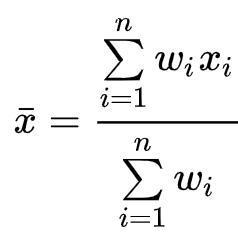

### Dónde:

### x =	media ponderada
### n =	número de observaciones del cálculo de media
### wi=	peso del activo i en valores absolutos: cantidad de dinero
### xi=	valores (betas) del observación i

### Mismo procedimiento aplica para el CAPM de la cartera propuesta


In [53]:
# Haremos la asumpcion de qué cada activo tiene el mismo peso dentro de la cartera, de modo de que
# podemos precindir de la sumatoria de los pesos absolutos en el denominador.

peso_por_activo = 1 / df.iloc[:, :-1].shape[1]

beta_cartera = sum((beta * .25) for beta in df_resultados["Betas"])

er_cartera = df_resultados["Rendimiento Esperado (CAPM)"].mean()

print(f"Cada activo pesa en la cartera {round(peso_por_activo * 100)}%")
print(f"Con una cartera dividida en mismas proporciones se tiene una beta de cartera de: {round(beta_cartera, 2)}")
print(f"Con una cartera dividida en mismas proporciones se tiene una Rendimiento Esperado en base a CAPM de cartera de: {round(er_cartera * 100, 2)}%")

Cada activo pesa en la cartera 25%
Con una cartera dividida en mismas proporciones se tiene una beta de cartera de: 1.41
Con una cartera dividida en mismas proporciones se tiene una Rendimiento Esperado en base a CAPM de cartera de: 41.61%


## ¡Y eso sería todo!

### A continuación, dejo un pequeña lista de lecturas a modo de referencias:

### A simplified model for portfolio analysis (1963) by Sharpe
### Teoría de cartera y del mercado de capitales (1964) By Sharpe
### Gestión de carteras (2006) by Gómez-Bezares
### El mercado español de capitales en un contexto internacional (1984) by Berges
